In [1]:
import numpy as np
import math

In [2]:
class BinominalDistribution:
    def calculate(self, p, n, x):
        return p**x * (1-p)**(n-x)

    def calculate_comb(self, p, n, x):
        return math.factorial(n) / (math.factorial(x) * math.factorial(n-x)) * self.calculate(p, n, x)
    
    def mean(self, n, p):
        return n * p
    
    def variance(self, n, p):
        return n * p * (1-p)
    
    def standard_deviation(self, variance):
        return math.sqrt(variance)
        
    def print(self, key, value, percentage=False):
        if (percentage):
            print(f"    {key.capitalize()}: {value*100:.2f}")
        else:
            print(f"    {key.capitalize()}: {value:.2f}")
        
    def cal(self, p, n, x):
        print("--- Binominal Distribution ----")
        a = self.calculate_comb(p, n, x)
        b = self.mean(n, p)
        c = self.variance(n, p)
        d = self.standard_deviation(self.variance(n, p))
        self.print("Probability  ", a, True)
        self.print("Mean         ", b)
        self.print("Variance     ", c)
        self.print("Standard Dev ", d)
        return a, b, c, d

In [3]:
pdf = BinominalDistribution()
pdf.cal(0.5, 4, 1)
    

--- Binominal Distribution ----
    Probability  : 25.00
    Mean         : 2.00
    Variance     : 1.00
    Standard dev : 1.00


(0.25, 2.0, 1.0, 1.0)

In [4]:
a, _, _, _ = pdf.cal(0.12, 20, 0)
b, _, _, _ = pdf.cal(0.12, 20, 1)
c, _, _, _ = pdf.cal(0.12, 20, 2)

a + b + c

--- Binominal Distribution ----
    Probability  : 7.76
    Mean         : 2.40
    Variance     : 2.11
    Standard dev : 1.45
--- Binominal Distribution ----
    Probability  : 21.15
    Mean         : 2.40
    Variance     : 2.11
    Standard dev : 1.45
--- Binominal Distribution ----
    Probability  : 27.40
    Mean         : 2.40
    Variance     : 2.11
    Standard dev : 1.45


0.5631315224061946

# Using lib

In [5]:
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [6]:
list_ = []
for i in range(10000):
    list_.append(np.random.binomial(20, 0.12))
# It's the same to do
listinha = np.random.binomial(20, 0.12, 10000)

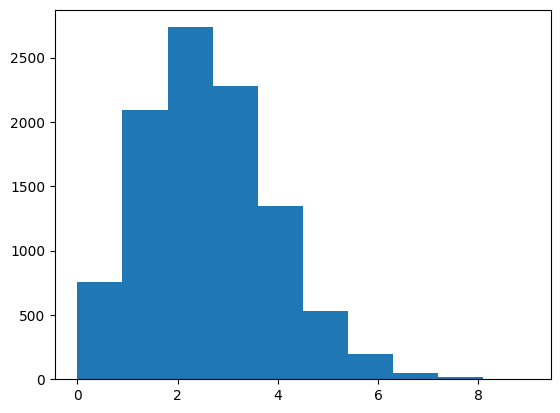

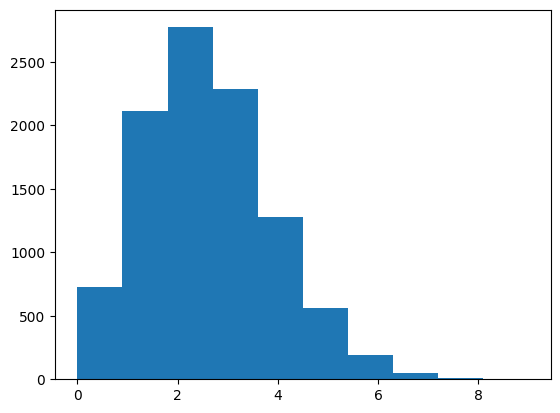

In [7]:
plt.hist(list_);
plt.figure()
plt.hist(listinha);


/tmp/ipykernel_686431/3757037369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=listinha, palette='Set1');


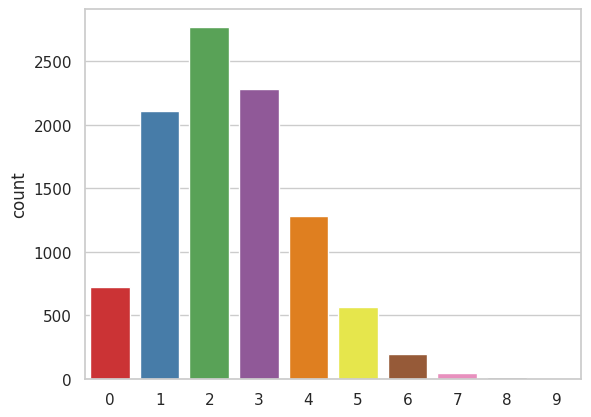

In [8]:
sns.set_theme(style='whitegrid');
sns.countplot(x=listinha, palette='Set1');

In [9]:
print("{:.2f}".format(statistics.mean(list_)))
print("{:.2f}".format(statistics.variance(list_)))
print("{:.2f}".format(statistics.stdev(list_)))
# --- Binominal Distribution ----
#     Mean         : 2.40
#     Variance     : 2.11
#     Standard dev : 1.45

2.41
2.09
1.45


In [10]:
# Hey!! That's almost the same. The approximation is great!

In [11]:
zero_defects = np.random.binomial(0, 0.12, 20)
one_defects = np.random.binomial(1, 0.12, 20)
two_defects = np.random.binomial(2, 0.12, 20)

/tmp/ipykernel_686431/1286830585.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=two_defects, palette='Set1')


<Axes: ylabel='count'>

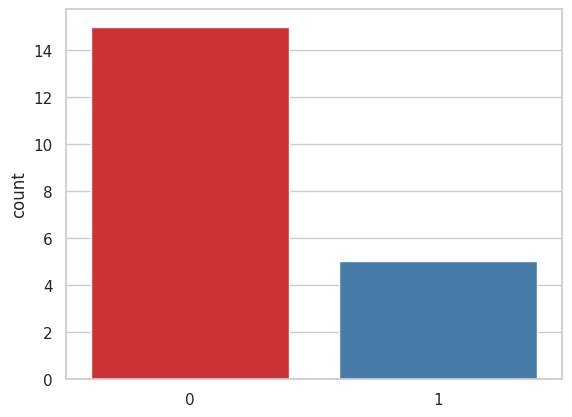

In [12]:
sns.countplot(x=two_defects, palette='Set1')

# Scipy!

In [13]:
from scipy.stats import binom

In [31]:
# Cummulative distribution function
defects = 0
x = defects
n = 1000
p = 0.002

In [32]:
# It's a different order. Caution!
binom.cdf(x, n, p) 

np.float64(0.13506452244668363)

In [26]:
print(f"Probability of 2 defects after 20 tries: {binom.pmf(x, n, p)*100:.1f}%")
print("Mean              : {:.2f}".format(binom.mean(n, p)))
print("Variance          : {:.2f}".format(binom.var(n, p)))
print("Standard Deviation: {:.2f}".format(binom.std(n, p)))

Probability of 2 defects after 20 tries: 0.0%
Mean              : 20.00
Variance          : 19.60
Standard Deviation: 4.43


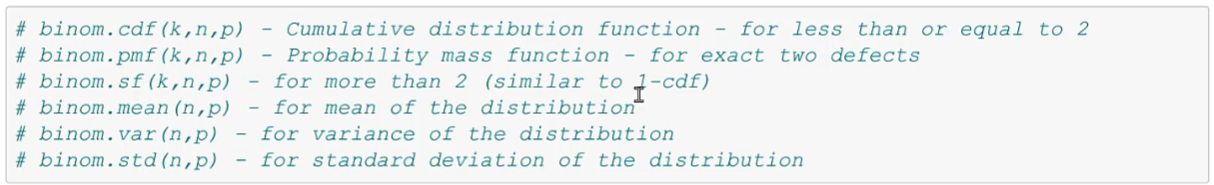

In [27]:
# If we want to get the graph of the distribution, we have to use the domain
domain = np.arange(0, 21)
print(domain)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [28]:
distribution = binom.pmf(domain, 20, 0.15)

<Axes: >

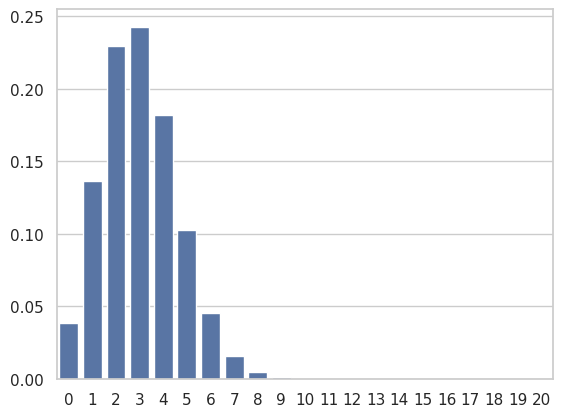

In [29]:
sns.barplot(x=domain, y=distribution)

In [30]:
help(binom.sf)

Help on method sf in module scipy.stats._distn_infrastructure:

sf(k, *args, **kwds) method of scipy.stats._discrete_distns.binom_gen instance
    Survival function (1 - `cdf`) at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    sf : array_like
        Survival function evaluated at k.

